#Analysis of Student Activities and Performance

This project explores how extracurricular activities and other behavioral metrics such as study hours, sleep patterns, and practice habits impact academic performance.

We use a dataset sourced from Kaggle and apply a multiple linear regression model to uncover correlations and predict student performance metrics.

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# Load dataset
d = pd.read_csv('Student_Data.csv')

In [ ]:
# handle text column using label encoding
activities=LabelEncoder()
d['Ext_Act']=activities.fit_transform(d['Extracurricular_Activities'])

In [ ]:
#remove extra column
data=d.drop('Extracurricular_Activities',axis='columns')
data

,Hours_Studied,Sleep_Hours,Sample_Question_Papers_Practiced,Previous_Scores,Math_Score,Reading_Score,Writing_Score,Performance_Index,Ext_Act
0,5,8,2,71.643407,96.000000,91.914810,69.193293,51,0
1,2,4,8,44.918561,79.539341,94.110031,65.325012,20,1
2,7,7,5,59.397420,79.057943,73.875249,47.492445,46,1
3,6,8,5,40.607929,67.180579,63.089488,61.699578,28,1
4,7,4,6,48.502243,68.173916,56.312435,69.173343,41,0
...,...,...,...,...,...,...,...,...,...
995,2,7,0,53.022855,77.161150,80.935222,76.592781,30,0
996,2,6,6,33.759178,45.983258,89.832798,72.280321,19,1
997,2,5,7,68.466667,59.729003,52.873309,97.884260,41,1
998,5,9,4,59.937736,42.519501,76.738999,47.308208,47,1


In [ ]:
# information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours_Studied                     1000 non-null   int64  
 1   Sleep_Hours                       1000 non-null   int64  
 2   Sample_Question_Papers_Practiced  1000 non-null   int64  
 3   Previous_Scores                   1000 non-null   float64
 4   Math_Score                        1000 non-null   float64
 5   Reading_Score                     1000 non-null   float64
 6   Writing_Score                     1000 non-null   float64
 7   Performance_Index                 1000 non-null   int64  
 8   Ext_Act                           1000 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 70.4 KB


In [ ]:
#check null values
data.isnull().sum()

,0
Hours_Studied,0
Sleep_Hours,0
Sample_Question_Papers_Practiced,0
Previous_Scores,0
Math_Score,0
Reading_Score,0
Writing_Score,0
Performance_Index,0
Ext_Act,0


<Axes: >

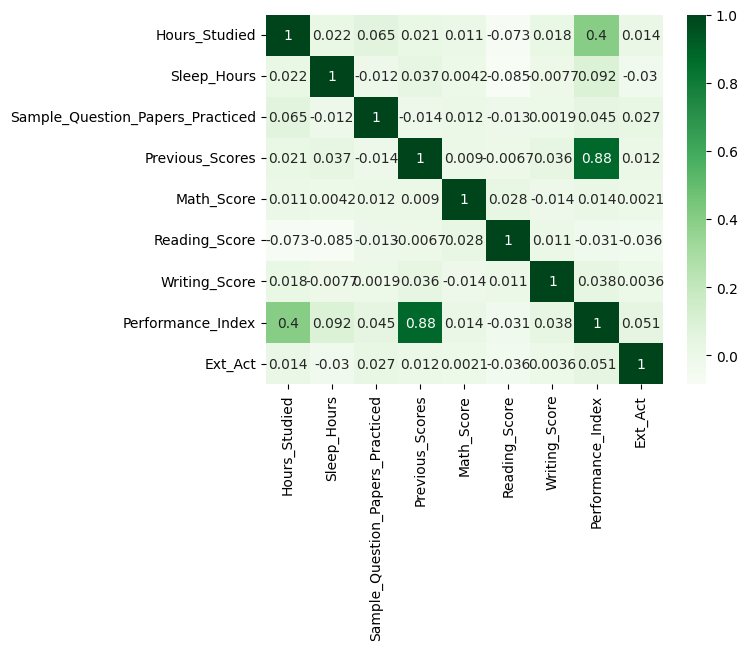

In [ ]:
#correlation matrix
cor=data.corr()
sns.heatmap(cor, annot=True, cmap='Greens')

In [ ]:
# separate variables X and Y,
# X is feature (These are the input variables or attributes used to predict the outcome)
# Y is label (These are the input variables or attributes used to predict the outcome.)
X=data.drop('Performance_Index',axis='columns')
Y=data.Performance_Index

In [ ]:
# split data set into training and testing parts
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
#checking length of training and testing data
print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

800
200
800
200


In [ ]:
#Model Training
M=LinearRegression()
M.fit(X_train,Y_train)

LinearRegression()

In [ ]:
# R-Squared
M.score(X_test,Y_test)

0.9231242880319414

In [ ]:
#predictions
Y_pred=M.predict(X_test)

In [ ]:
# mean squared error
mse = np.sqrt(mean_squared_error(Y_test, Y_pred))
mse

np.float64(5.4985215814321275)

In [ ]:
# Mean absoute error
mae = mean_absolute_error(Y_test, Y_pred)
mae

4.3930829691813145

In [ ]:
#some random values of features (X)
x=[[6,7,5,81,93,92,90,1]]

In [ ]:
#intercept
b=M.intercept_
# coefficient
m=M.coef_

In [ ]:
#predicting y using mathematical formula
mx=m*x
mx=mx.sum()
y=mx+b
y

np.float64(70.22977506083984)

In [ ]:
#predicting y using model (algorithm)
y1=M.predict(x)
y1=float(y1)
y1

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-32-213757e68512>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y1=float(y1)


70.22977506083984

In [ ]:
#checking wether both are are equal or not to verify
y==y1

np.True_

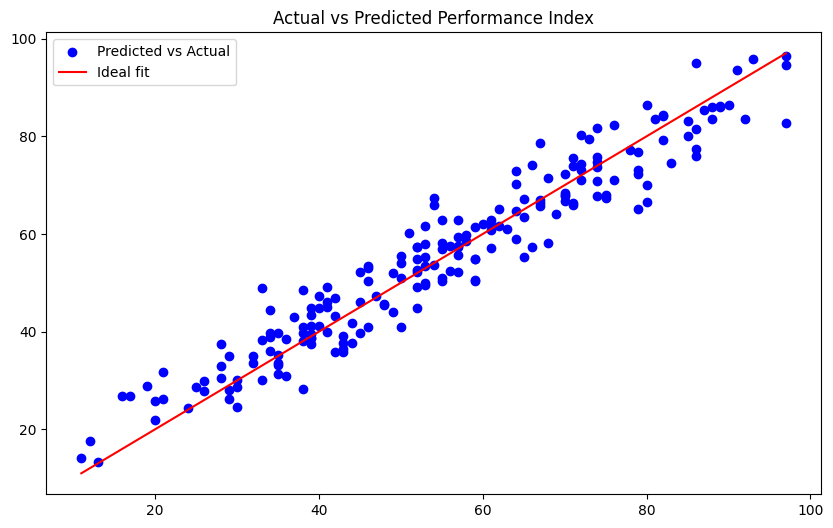

In [ ]:
# Plotting the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, color='blue', label='Predicted vs Actual')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', label='Ideal fit')
plt.title('Actual vs Predicted Performance Index')
plt.legend()
plt.show()